In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
import cmath

plt.rcParams["figure.figsize"] = (14,6)

##Implement a function that takes a sound wave and reduces the noise in it.##

**Sound Denoising function**

1. Apply FFT
2. Apply Threshold
3. Apply Inverse FFT


In [ ]:

def denoising_sound(sound, threshold):
  n = len(sound)
  fft = np.fft.fft(sound, n)
  power_spectrum_noisy = fft * np.conj(fft)/n
  frequency = (1/(n)) * np.arange(n) 

  power_spectrum_idxs = power_spectrum_noisy > threshold
  power_spectrum_denoised = power_spectrum_noisy * power_spectrum_idxs 
  fft_denoised = power_spectrum_idxs * fft 

  denoised_sound = np.fft.ifft(fft_denoised) 
  return denoised_sound, power_spectrum_noisy, power_spectrum_denoised

In [ ]:
Fs = 16000 # sampling freqency
TWOPI = 2 * np.pi

# Use for preaparing audio sound from signal
def prepare(x, max_value = 3):
  N = len(x)
  # fade-in and fade-out times max 0.2 seconds
  tf = min(int(0.2 * Fs), int(0.1 * N))
  for n in range(0, int(tf)):
    s = float(n) / float(tf)
    x[n] *= s
    x[N-n-1] *= s
  # let's append an anti-normalization tail; drawback is one second of silence in the end
  x = np.concatenate((x, np.linspace(0, max_value, int(Fs/2)), np.linspace(max_value, 0, int(Fs/2))))
  return x

# Create a clarinet signal
# https://en.wikipedia.org/wiki/Clarinet
def clarinet(f, phase = []):
  # length in seconds of audio clips
  T = 4
  
  # we will keep 5 harmonics and the fundamental
  # amplitude of components: 
  ha = [0.75, 0.5, 0.14, 0.5, 0.12, 0.17]
  
  # phase
  phase = np.concatenate((phase, np.zeros(len(ha)-len(phase))))

  x = np.zeros((T * Fs))
  # clarinet has only odd harmonics
  n = np.arange(len(x))
  for k, h in enumerate(ha):
    x += h * np.sin(phase[k] + TWOPI * (2*k + 1) * (float(f)/Fs) * n)
  return x


###Creating a clarinet sound signal###

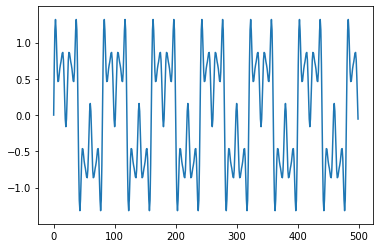

In [ ]:
# fundamental frequency of sound: D4
D4 = 200
sound = clarinet(D4)

plt.plot(sound[0:500])
plt.ylim([-1.5, 1.5])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.show()

# and play the (using preparing function):
IPython.display.Audio(prepare(np.copy(sound)), rate=Fs)

###Adding some random noise to the sound and convert into a noisy signal###

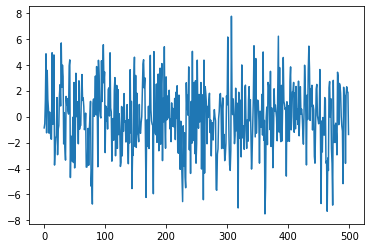

In [ ]:
noise = 2.5 * np.random.randn(len(sound))
noise_sound = sound + noise  
plt.plot(noise_sound[0:500])
plt.show()
# play the noisy sound (using preparing function)
IPython.display.Audio(prepare(np.copy(noise_sound)), rate=Fs)

###Denoising the noisy sound using predefined function###

*This function has been implemented above.*

```
def denoising_sound(sound, threshold):
  n = len(sound)
  fft = np.fft.fft(sound, n)
  power_spectrum_noisy = fft * np.conj(fft)/n
  frequency = (1/(n)) * np.arange(n) 

  power_spectrum_idxs = power_spectrum_noisy > threshold
  power_spectrum_denoised = power_spectrum_noisy * power_spectrum_idxs 
  fft_denoised = power_spectrum_idxs * fft 

  denoised_sound = np.fft.ifft(fft_denoised) 
  return denoised_sound, power_spectrum_noisy, power_spectrum_denoised
```





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


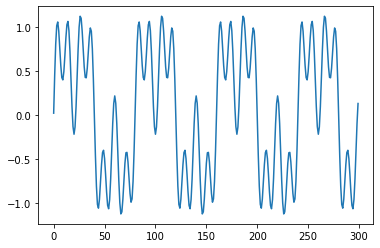

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
th = 3000
denoised_sound, power_spectrum_noisy, power_spectrum_denoised = denoising_sound(noise_sound, th)
plt.plot(denoised_sound[0:300])
plt.show()
# play the noisy sound (using preparing function)
IPython.display.Audio(prepare(np.copy(denoised_sound)), rate=Fs)

###Visualizing the details about the denoising process and analyzing it###

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


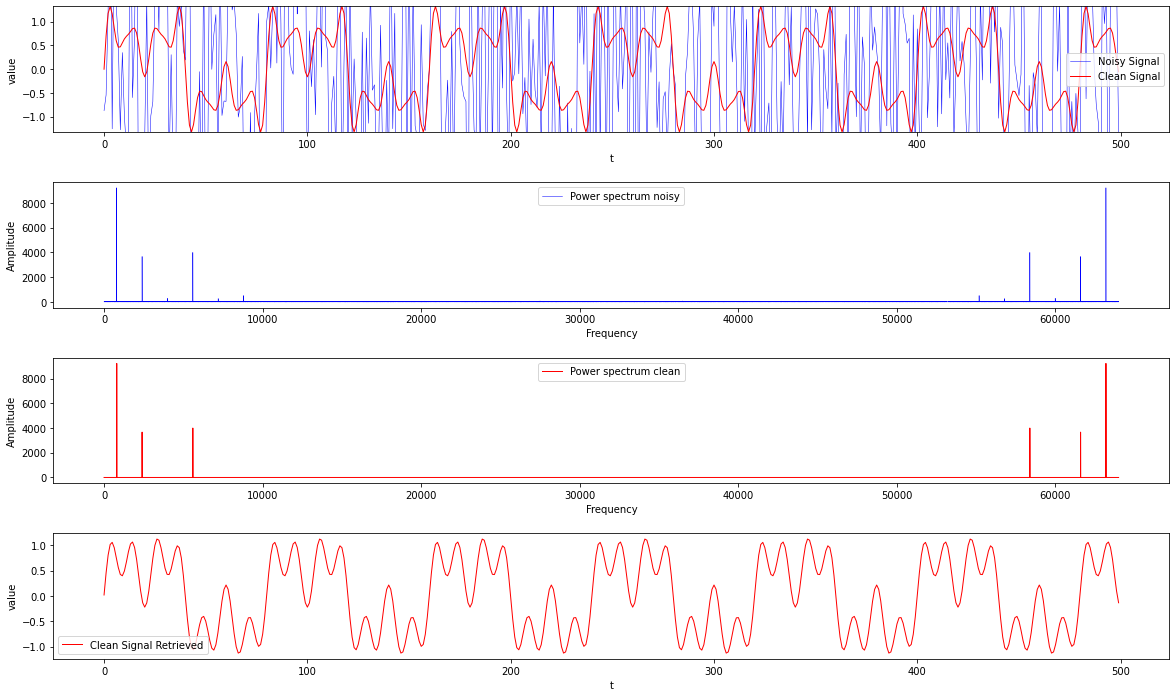

In [ ]:
## Visualization
minsignal, maxsignal = sound.min(), sound.max()
plt.rcParams["figure.figsize"] = (20,12)
fig, ax = plt.subplots(4,1)
ax[0].plot(noise_sound[0:500], color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(sound[0:500], color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('t')
ax[0].set_ylabel('value')
ax[0].legend()

ax[1].plot(power_spectrum_noisy, color='b', lw=0.5, label='Power spectrum noisy')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(power_spectrum_denoised, color='r', lw=1, label='Power spectrum clean')
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(denoised_sound[0:500], color='r', lw=1, label='Clean Signal Retrieved')
ax[0].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t')
ax[3].set_ylabel('value')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

TypeError: ignored

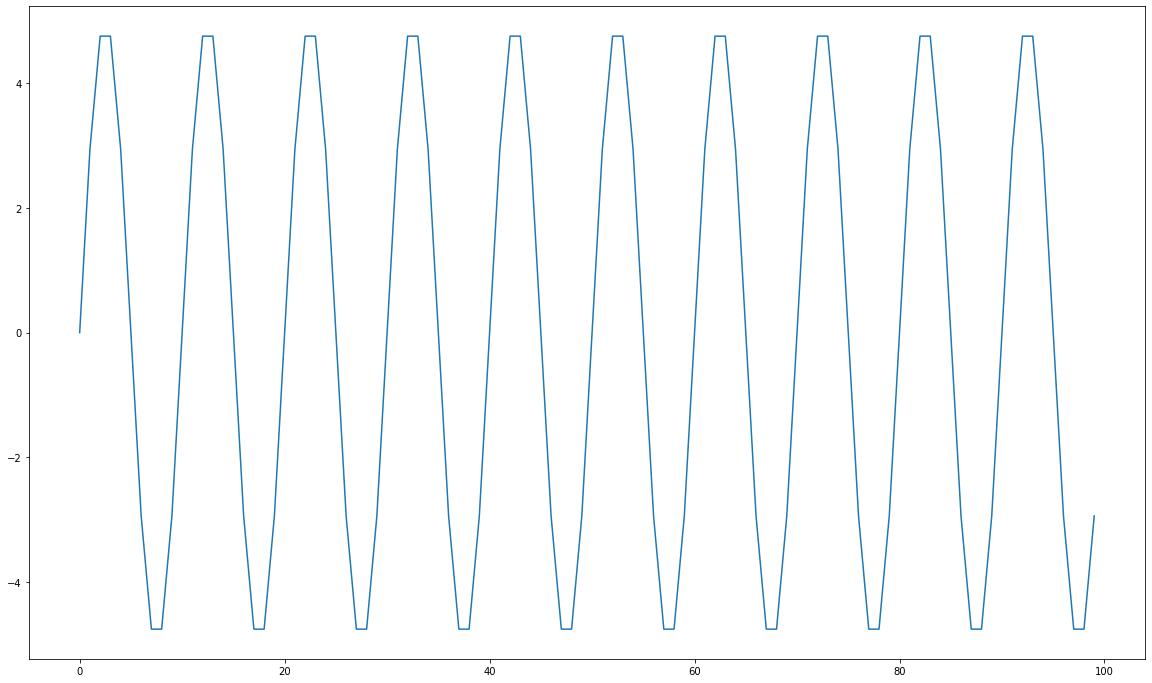

In [ ]:
dt = 0.0001
t = np.arange(0, 5, dt)
sin_wave = 5 * np.sin(TWOPI*1000*t)
plt.plot(sin_wave[0:100])
IPython.display.Audio(sin_wave)